In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("../")

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
root = '/Users/tomasandrade/Documents/BSC/ICHOIR/applio/Applio_LS/experiments'

In [5]:
experiments_dict = {
    'maria': 'maria_v2', 
    'gt bass': 'gt_singer_bass_v0',
    'gt soprano': 'gt_singer_soprano_v0'
}

paths = [f'{root}/{exp}/metric_layers.csv' for exp in experiments_dict.values()]

In [ ]:
plt.figure(figsize=(10,4))

for exp in experiments_dict.keys():

    path = f'{root}/{experiments_dict[exp]}/metric_layers.csv'
    df = pd.read_csv(path, index_col=0)

    plt.plot(df['layer'], df['mi'], '-o', label = exp)

plt.legend()

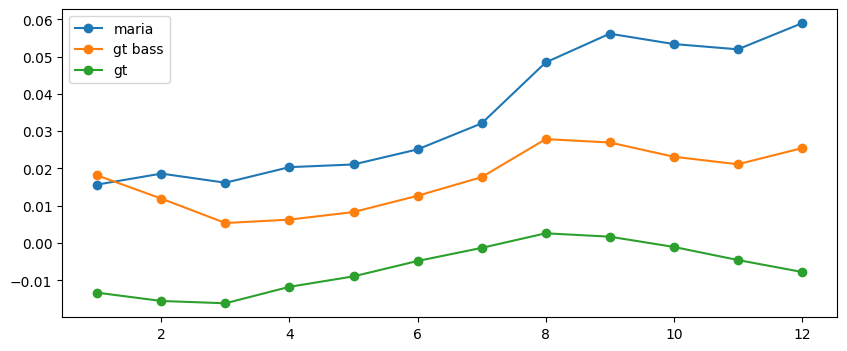

In [12]:
plt.figure(figsize=(10,4))

for exp in experiments_dict.keys():

    path = f'{root}/{experiments_dict[exp]}/metric_layers.csv'
    df = pd.read_csv(path, index_col=0)

    plt.plot(df['layer'], df['sil'], '-o', label = exp)

plt.legend()